# Chapter 4: Search in Complex Environments


## 4.1: Local Search and Optimization Problems

**Local search** algorithms don't keep track of the path traveled nor states reached. Some characteristics:
- (-) Not systematic (may not find a solution)
- (+) Use little memory
- (+) Can find (reasonable) solutions in large or infinite state spaces where systematic algos can't
- (+) Can solve **optimization problems** (find the best state for an **objective function**)

**State-space landscape**

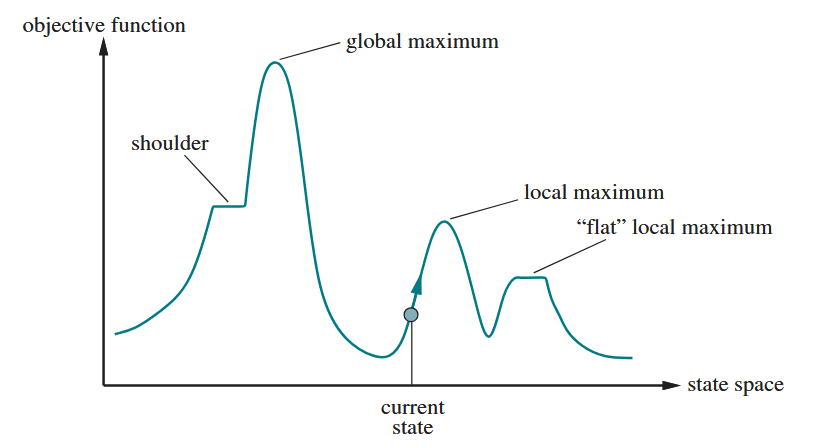

The x-axis represents the different states you can be in. The y-axis represents the value of the objective function. In the **hill-climbing** process, we start at a point and climb upward to attempt to find a **global maximum**. 

In some cases the y-axis represents a cost, in which case we'd actually want to go the opposite direction to find the **global minimum**, and then inverse analogue is called **gradient descent**.

Let's make this plot with code!

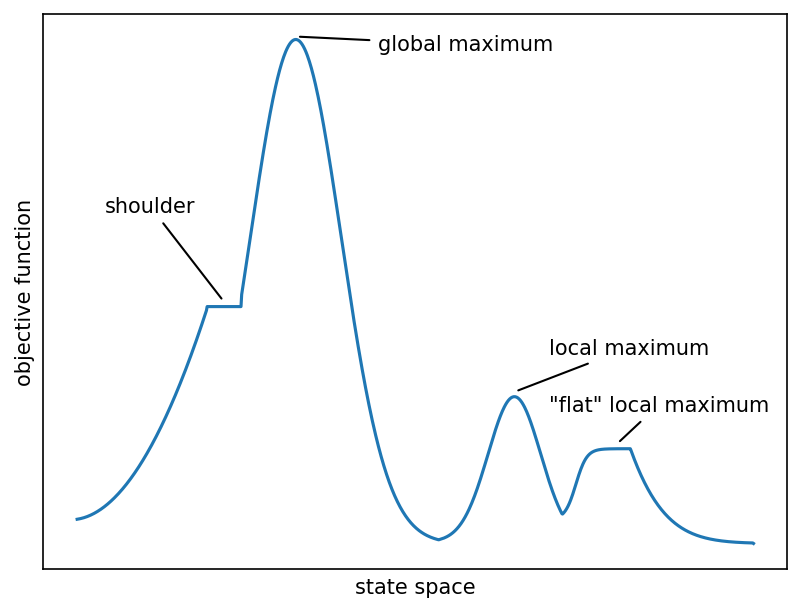

In [256]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Utility: probability mass function of normal distribution
def normal_pmf(x, mean, std_dev):
    return (1 / (math.sqrt(2 * math.pi * std_dev ** 2))) * (math.e ** -(((x - mean) ** 2) / 2 * (std_dev ** 2)))
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# Set up plot
figure = plt.figure()
figure.set_dpi(150)
axes = figure.add_subplot()
axes.set_ylabel('objective function')
axes.set_xlabel('state space')

axes.set_xticks([])
axes.set_yticks([])

x = np.linspace(1, 100, 1000)
condlist = [
    (x >= 0)  & (x < 20),
    (x >= 20) & (x < 25),
    (x >= 25) & (x < 54),
    (x >= 54) & (x < 72),
    (x >= 72) & (x < 82),
    (x >= 82) & (x < 100)
]

funclist = [
    lambda x: ((x * 0.8) ** 2) / 11.5 + 2.5,
    lambda _: 25,
    lambda x: normal_pmf(x, 33, 0.15) * 20,
    lambda x: normal_pmf(x, 65, 0.26) * 10 + 0.15,
    lambda x: sigmoid((x - 74) * 1.25) * 7.5 + 2.5,
    lambda x: normal_pmf(x, 61.6, 0.1) * 20
]

y = np.piecewise(x, condlist, funclist)

axes.plot(x, y)

# Annotations
arrow_props = {'arrowstyle': '-'}
axes.annotate('shoulder', xy=(22.5, 25.5), xytext = (5, 35), arrowprops=arrow_props)
axes.annotate('global maximum', xy=(33, 53.5), xytext=(45, 52), arrowprops=arrow_props)
axes.annotate('local maximum', xy=(65, 16), xytext=(70, 20), arrowprops=arrow_props)
axes.annotate('"flat" local maximum', xy=(80, 10.5), xytext=(70, 14), arrowprops=arrow_props)


plt.show()

### 4.1.1: Hill-climbing search

Hill-climbing keeps track of one current state and each iteration moves to the neighboring state with the highest value. It heads in the direction of **steepest descent**.

The book uses the **8-queens problem** as an example to showcase the hill-climbing algorithm:
- Place 8 queens on a chess board so that no queen attacks another
- A heuristic cost function h is the number of pairs of queens that are currently attacking each other. This is 0 for a solution

Let's code up an environment to test 8-queens. Here's the image from the textbook we're trying to simulate (Figure 4.3):
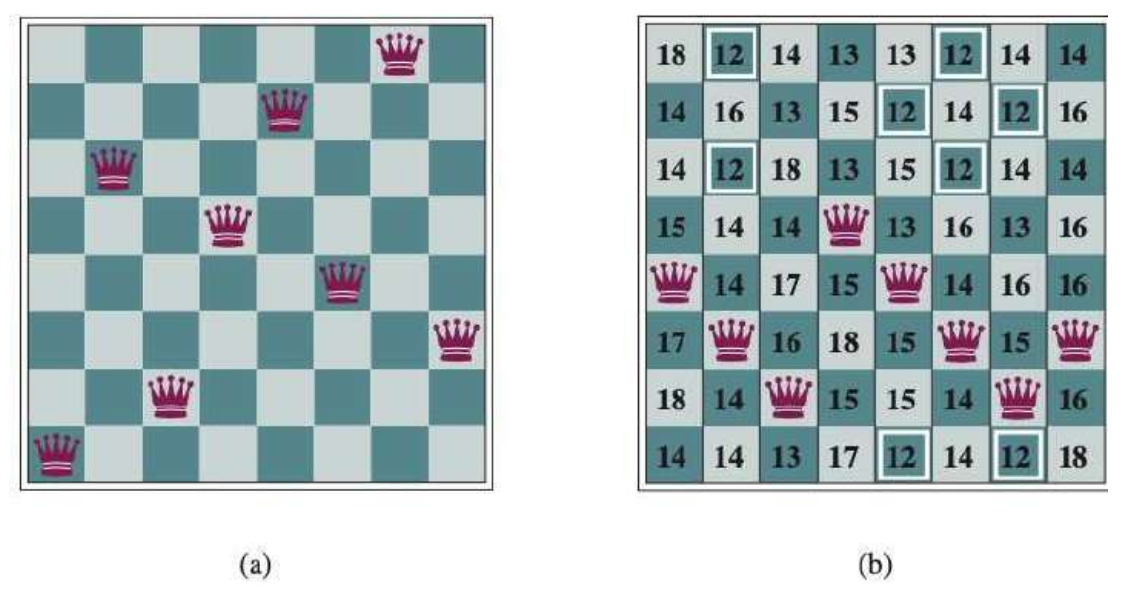

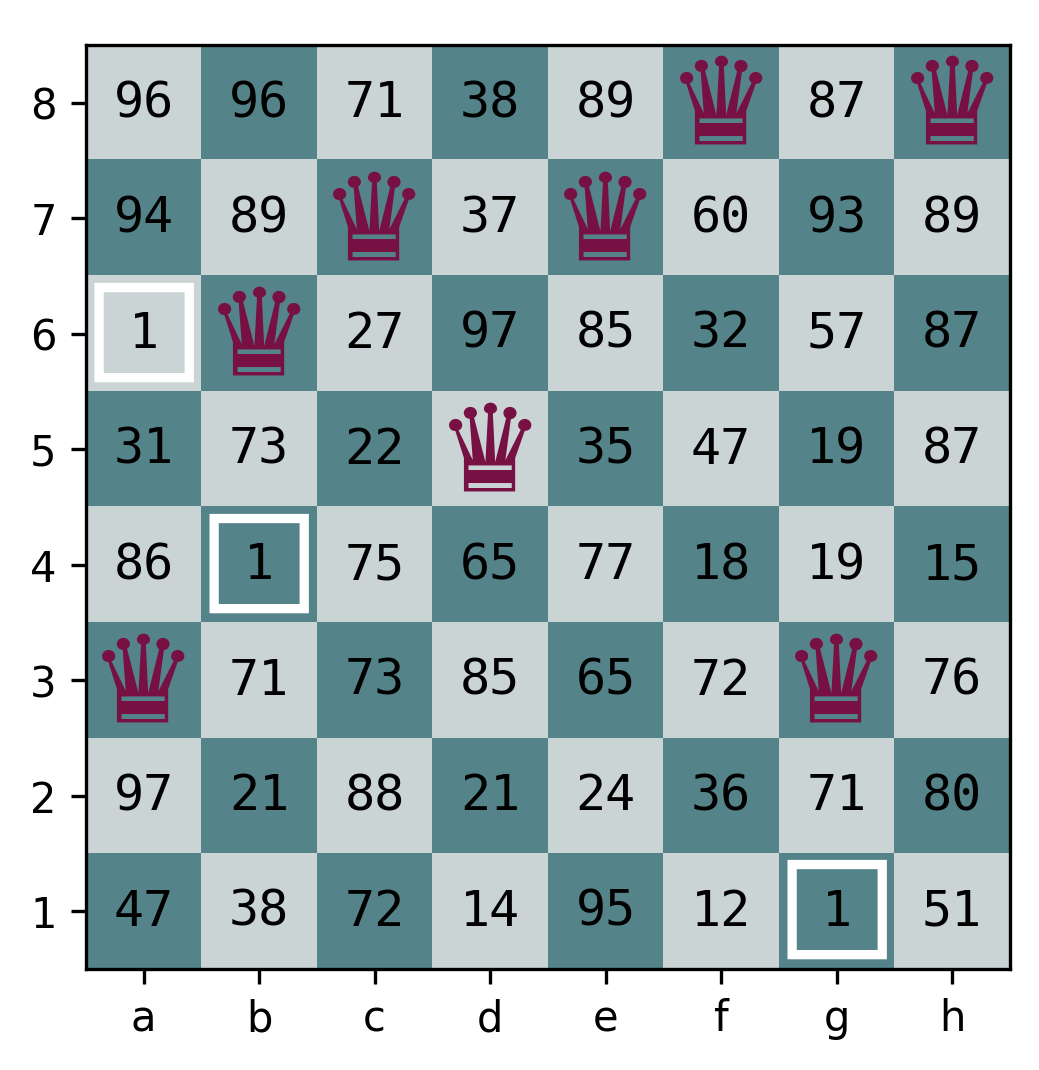

In [122]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from typing import Any

# First write a function that renders a chess board with queens and 
# optionally numbers representing the total cost if a queen is moved within its column
def plot_board(
        queen_rows: np.ndarray, 
        costs = None):
    '''Shows a plot of the chess board, with queens and optionally costs per cell
    
    Args:
        queen_positions: An array of ints in the range from 0 to 7 indicating which 
          row the queen in the ith column is placed. row 0 is at the top.
        costs: optional 2d array (8x8) of costs corresponding to each cell representing 
          the total cost if the queen in the jth column was moved to ith row. 
    '''
    figure = plt.figure(figsize=(4,4))
    figure.set_dpi(300)
    axes = figure.add_subplot()
    axes.set_xticks(range(8), ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
    axes.set_yticks(np.arange(7, -1, -1), np.arange(1, 9))

    # Generates xy data in alternating 0 and 1 based on indices into the 2d array
    board_colors = np.indices((8, 8)).sum(axis=0) % 2

    # Colors
    color_map = ListedColormap(['#CAD4D5', '#548389'])

    axes.imshow(board_colors, cmap=color_map)

    # find the lowest cost to highlight it in the cells it appears
    lowest_cost = 0
    if costs is not None:
        lowest_cost = np.min(costs)

    # Place the queens and costs
    for row in range(8):
        for col in range(8):
            value = None
            font_size = None
            if queen_rows[col] == row:
                value = '♛'
                font_size = 36
                color = "#771144"
            elif costs is not None:
                value = str(costs[row][col])
                font_size = 12
                color = "black"

            if value is not None:
                plt.text(
                    col, 
                    row, 
                    value, 
                    horizontalalignment='center', 
                    verticalalignment='center',
                    color=color,
                    fontsize=font_size,
                    fontfamily='monospace')
                
            if costs is not None and costs[row][col] == lowest_cost:
                plt.text(
                    col,
                    row - 0.05,
                    '□',
                    horizontalalignment='center', 
                    verticalalignment='center',
                    color='white',
                    fontsize=40,
                    fontfamily='monospace'
                )
    
    plt.show()

rng = np.random.default_rng()
costs = rng.integers(1, 100, size=(8, 8))
plot_board(rng.choice(range(8), 8, replace=True), costs)

In [123]:
import random

'''
- Chess board is 8x8

There are many opportunities for optimization. 

I won't bother, just structure the data however is initially intuitive to me 
and modify if necessary.
'''


# fill positions randomly
queen_rows = None # TODO


# Heuristic function, 0 for solution
def cost():
    # TODO
    return 0

## 4.2: Local Search in Continuous Spaces
Resources:
* [3Blue1Brown -  From Newton’s method to Newton’s fractal (which Newton knew nothing about)](https://www.youtube.com/watch?v=-RdOwhmqP5s)
* [Khan Academy - The Hessian matrix | Multivariable calculus](https://www.youtube.com/watch?v=LbBcuZukCAw)